For individuals who are only in the online program, analyze the relationship between donation frequency and whether OLP=1 across different age groups.  

For example, in age group 1 (25-34), divide the population into two groups:  
1. Alumni who are only in the OLP program (OLP=1).  
2. Alumni who are not in the OLP program (OLP=0).  

Compare the donation frequency between these two groups using a histogram.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [2]:
file_path = "3&4.xlsx"
excel_data = pd.ExcelFile(file_path)
excel_data.sheet_names

['olp=1', 'olp=0']

In [3]:
df_olp_1 = pd.read_excel(file_path, sheet_name='olp=1')
df_olp_0 = pd.read_excel(file_path, sheet_name='olp=0')

df_olp_1.head(), df_olp_0.head()

(   Age  Age Range Category Age Range  \
 0   54                   4     45-54   
 1   53                   4     45-54   
 2   39                   5     35-44   
 3   42                   5     35-44   
 4   43                   5     35-44   
 
                                  UI Degree(s)  Cumul Years of UI Giving  \
 0  U BUSN-Gies College of Business-MBA (2019)                         0   
 1                U BUSN-Accountancy-MS (2020)                         0   
 2  U BUSN-Gies College of Business-MBA (2020)                         0   
 3  U BUSN-Gies College of Business-MBA (2020)                         0   
 4                U BUSN-Accountancy-MS (2021)                         0   
 
    Gies Lifetime Giving as of 1/8/25  
 0                                  0  
 1                                  0  
 2                                  0  
 3                                  0  
 4                                  0  ,
    Age  Age Range Category Age Range  \
 0   68     

1. Compare the time difference between the online graduation year and first donation year (for donors) and plot the distribution.

In [27]:
# Load the new cleaned Excel file
file_path_new = "analysis sheet cleaned.xlsx"
xls_new = pd.ExcelFile(file_path_new)

# Load the data
df_new = pd.read_excel(xls_new, sheet_name="Sheet1")

# Display the first few rows to understand the structure
df_new.head()

,Household ID,Individual LookupID,Age,Birth Date,Age Range Category,Age Range,Gies Grad,OLP Grad (Y/N),UI Degree1,Graduation year,...,UIUC Affiliation Rank,UIUC Affiliations Degree,UIUC Affiliation Employment,UIUC Affiliations Events,UIUC Affiliation-Giving,UIUC Affiliation-Interests,UIUC Affiliation-Student Involvement,Affiliations-UIUC Volunteer,Affiliations-UIUC Total Score,UIUC Affiliation minus giving
0,13571649,13570337,54,19710104,4,45-54,Yes,1,U BUSN-Gies College of Business-MBA,2019,...,1,500,0,0,0,0,0,0,500,500
1,13711510,13710801,53,19710720,4,45-54,Yes,1,U BUSN-Accountancy-MS,2020,...,1,500,0,0,0,0,0,0,500,500
2,13781193,13777302,39,19850513,5,35-44,Yes,1,U BUSN-Gies College of Business-MBA,2020,...,1,500,0,0,0,0,0,0,500,500
3,13711304,13710394,42,19820916,5,35-44,Yes,1,U BUSN-Gies College of Business-MBA,2020,...,1,500,0,0,0,0,0,0,500,500
4,14088944,14084151,43,19811125,5,35-44,Yes,1,U BUSN-Accountancy-MS,2021,...,1,500,0,0,0,0,0,0,500,500


<ipython-input-28-4e8354fce9e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_donors_new["Donation Delay"] = df_donors_new["First Donation Year"] - df_donors_new["Graduation year"]


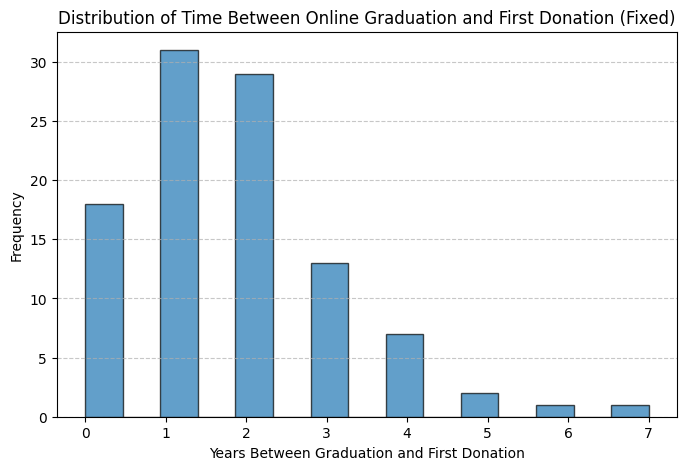

In [28]:
# Use "Cash First Year" as the First Donation Year
df_new["First Donation Year"] = pd.to_numeric(df_new["Cash First Year"], errors="coerce")

# Filter only online students who have donated
df_donors_new = df_new[(df_new["OLP Grad (Y/N)"] == 1) & (df_new["First Donation Year"].notna())]

# Calculate the time difference between graduation and first donation
df_donors_new["Donation Delay"] = df_donors_new["First Donation Year"] - df_donors_new["Graduation year"]

# Remove unrealistic values (negative or too high delays)
df_donors_new = df_donors_new[(df_donors_new["Donation Delay"] >= 0) & (df_donors_new["Donation Delay"] <= 50)]

# Replot the cleaned histogram
plt.figure(figsize=(8, 5))
plt.hist(df_donors_new["Donation Delay"].dropna(), bins=15, edgecolor='black', alpha=0.7)
plt.xlabel("Years Between Graduation and First Donation")
plt.ylabel("Frequency")
plt.title("Distribution of Time Between Online Graduation and First Donation (Fixed)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The histogram represents the distribution of the time difference (in years) between online graduation and the first donation for individuals who have donated.

**Key Observations:**

**Most donations happen within 0-3 years post-graduation**, with peaks at 1 and 2 years.

**Very few donations occur after 5 years**, suggesting that recent graduates are more likely to contribute.

**Some donate immediately after graduation (0 years delay)**, which could indicate engagement initiatives targeting fresh alumni.

2. Analyze the correlation between OLP status (0 or 1) and donation likelihood for online program participants using correlation analysis and logistic regression.

Chi-Square Stat: 653.6421934353519, p-value: 3.6058632136968556e-144, Degrees of Freedom: 1
Expected Frequencies:
[[36481.28552979 13202.71447021]
 [ 1611.71447021   583.28552979]]


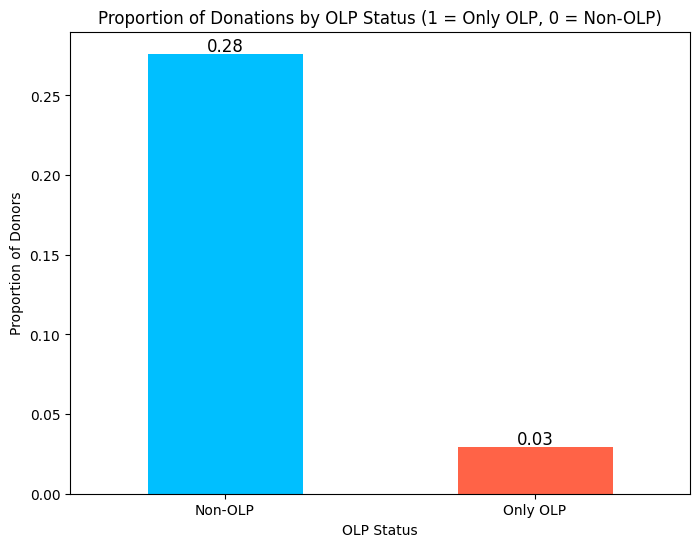

In [30]:
# Read data from the Excel sheets
df_olp_1 = pd.read_excel(file_path, sheet_name='olp=1')
df_olp_0 = pd.read_excel(file_path, sheet_name='olp=0')

# Add a new column to indicate the OLP status (1 or 0)
df_olp_1["OLP Grad (Y/N)"] = 1  # OLP=1 group
df_olp_0["OLP Grad (Y/N)"] = 0  # OLP=0 group

# Combine both dataframes into one
df_combined = pd.concat([df_olp_1, df_olp_0], ignore_index=True)

# Create the "Donated" column: 1 if donated, 0 if not (based on the amount)
df_combined["Donated"] = (df_combined["Gies Lifetime Giving as of 1/8/25"] > 0).astype(int)

# Contingency table: Cross-tabulation of OLP status and donation behavior
contingency_table = pd.crosstab(df_combined["OLP Grad (Y/N)"], df_combined["Donated"])

# Perform the Chi-Square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the result of the test
print(f"Chi-Square Stat: {chi2_stat}, p-value: {p_value}, Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Plot the proportion of donations for each OLP group
donation_proportion = df_combined.groupby('OLP Grad (Y/N)')['Donated'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
ax = donation_proportion.plot(kind='bar', color=['#00BFFF', '#FF6347'])
plt.xticks([0, 1], ['Non-OLP', 'Only OLP'], rotation=0)
plt.ylabel('Proportion of Donors')
plt.title('Proportion of Donations by OLP Status (1 = Only OLP, 0 = Non-OLP)')
plt.xlabel('OLP Status')

# Add number labels on each bar
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}',
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()


# If p-value < 0.05, it indicates a significant relationship


Logistic Regression

In [23]:
# Logistic Regression
X = sm.add_constant(df_combined['OLP Grad (Y/N)'])  # Independent variable: OLP status
y = df_combined['Donated']  # Dependent variable: Donation status

logit_model = sm.Logit(y, X)  # Fit logistic regression model
result = logit_model.fit()  # Run the logistic regression

# Display logistic regression results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.570006
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Donated   No. Observations:                51879
Model:                          Logit   Df Residuals:                    51877
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Feb 2025   Pseudo R-squ.:                 0.01548
Time:                        22:44:25   Log-Likelihood:                -29571.
converged:                       True   LL-Null:                       -30036.
Covariance Type:            nonrobust   LLR p-value:                2.933e-204
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9636      0.010    -96.027      0.000      -0.983      -0.944
OLP Grad (Y/N)   

3. Compare the number of donations by OLP status across age groups (e.g., 25-34), using a histogram.

In [4]:
olp_1_count_average = df_olp_1.groupby('Age Range')['Cumul Years of UI Giving'].mean()
olp_0_count_average = df_olp_0.groupby('Age Range')['Cumul Years of UI Giving'].mean()

age_mapping = {
    '25-34': 1,
    '35-44': 2,
    '45-54': 3,
    '55-64': 4,
    '65-74': 5,
    '75-84': 6
}

numeric_index_olp_1 = olp_1_count_average.index.astype(str).map(age_mapping)
numeric_index_olp_0 = olp_0_count_average.index.astype(str).map(age_mapping)

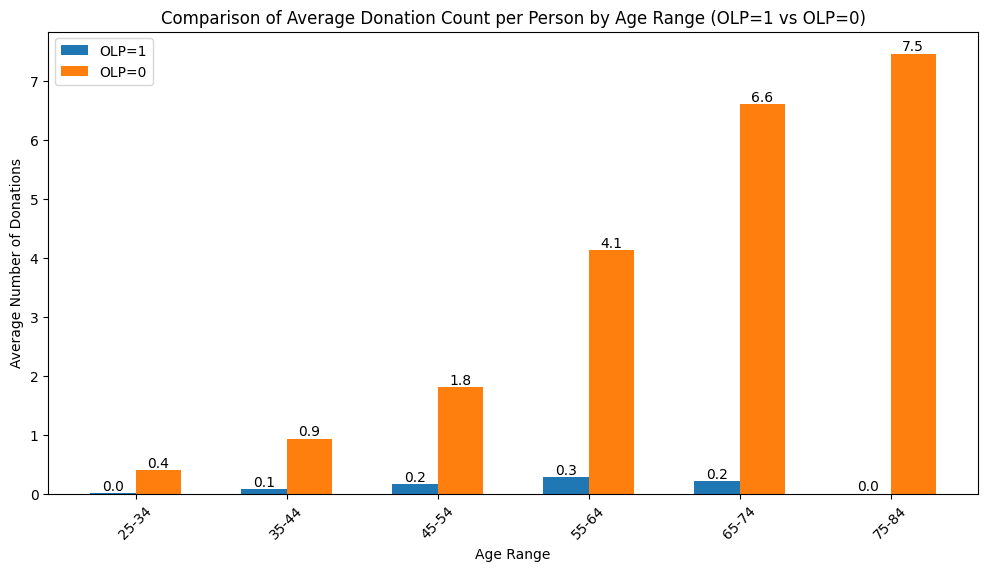

In [14]:
plt.figure(figsize=(12, 6))

# Create bar charts for OLP=1 and OLP=0 groups
bars1 = plt.bar(numeric_index_olp_1 - 0.15, olp_1_count_average.values, width=0.3, label='OLP=1')
bars2 = plt.bar(numeric_index_olp_0 + 0.15, olp_0_count_average.values, width=0.3, label='OLP=0')

# Add value labels on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

# Set axis labels and title
plt.xlabel('Age Range')
plt.ylabel('Average Number of Donations')
plt.title('Comparison of Average Donation Count per Person by Age Range (OLP=1 vs OLP=0)')

# Set x-axis labels with proper rotation
plt.xticks(list(age_mapping.values()), list(age_mapping.keys()), rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.show()


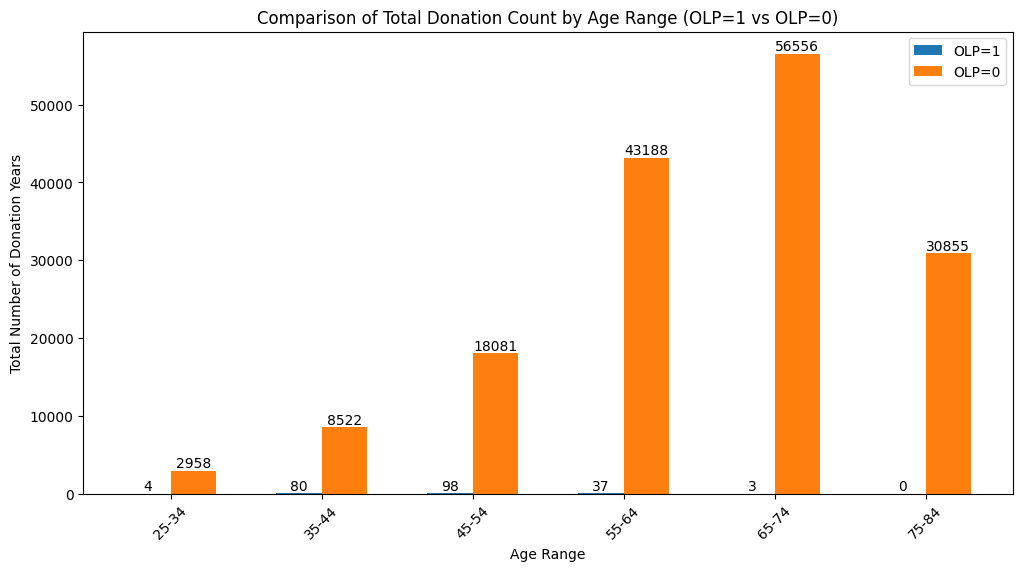

In [15]:
# Group data by age range and sum the total number of donation years
olp_1_count_total = df_olp_1.groupby('Age Range')['Cumul Years of UI Giving'].sum()
olp_0_count_total = df_olp_0.groupby('Age Range')['Cumul Years of UI Giving'].sum()

plt.figure(figsize=(12, 6))

# Create bar charts for OLS=1 and OLS=0 groups
bars1 = plt.bar(numeric_index_olp_1 - 0.15, olp_1_count_total.values, width=0.3, label='OLP=1')
bars2 = plt.bar(numeric_index_olp_0 + 0.15, olp_0_count_total.values, width=0.3, label='OLP=0')

# Add value labels on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=10)

# Set axis labels and title
plt.xlabel('Age Range')
plt.ylabel('Total Number of Donation Years')
plt.title('Comparison of Total Donation Count by Age Range (OLP=1 vs OLP=0)')

# Set x-axis labels with proper rotation
plt.xticks(list(age_mapping.values()), list(age_mapping.keys()), rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.show()


4. Compare the distribution of total donation amounts by OLP status across age groups.

Following the approach above, compare the distribution of total donation amounts to identify any differences.

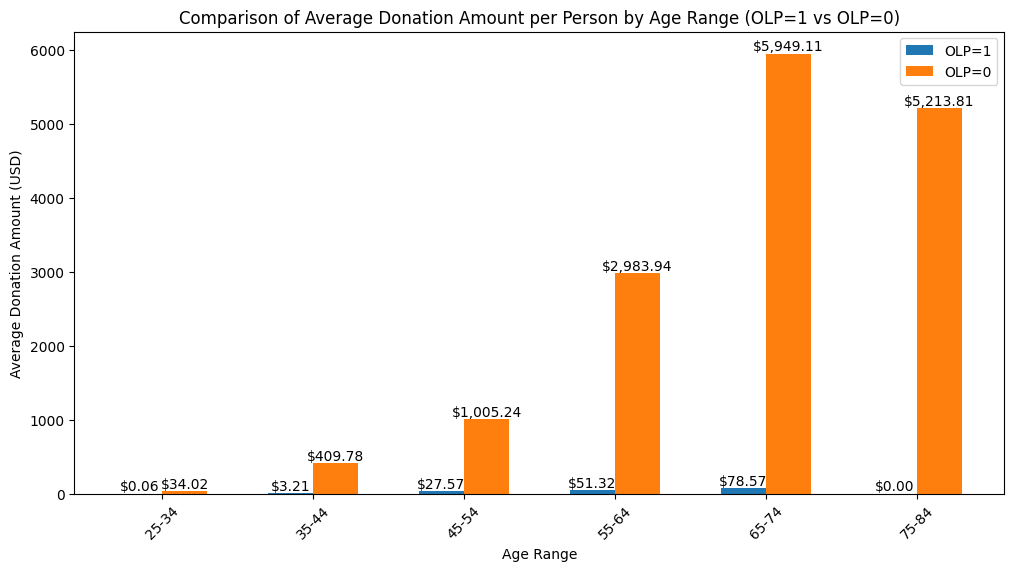

In [17]:
# Calculate the average donation amount per age range for OLS=1 and OLS=0 groups
olp_1_amount_average = df_olp_1.groupby('Age Range')['Gies Lifetime Giving as of 1/8/25'].mean()
olp_0_amount_average = df_olp_0.groupby('Age Range')['Gies Lifetime Giving as of 1/8/25'].mean()

plt.figure(figsize=(12, 6))

# Create bar charts for OLS=1 and OLS=0 groups
bars1 = plt.bar(numeric_index_olp_1 - 0.15, olp_1_amount_average.values, width=0.3, label='OLP=1')
bars2 = plt.bar(numeric_index_olp_0 + 0.15, olp_0_amount_average.values, width=0.3, label='OLP=0')

# Add value labels on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10)

# Set axis labels and title
plt.xlabel('Age Range')
plt.ylabel('Average Donation Amount (USD)')
plt.title('Comparison of Average Donation Amount per Person by Age Range (OLP=1 vs OLP=0)')

# Set x-axis labels with proper rotation
plt.xticks(list(age_mapping.values()), list(age_mapping.keys()), rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.show()


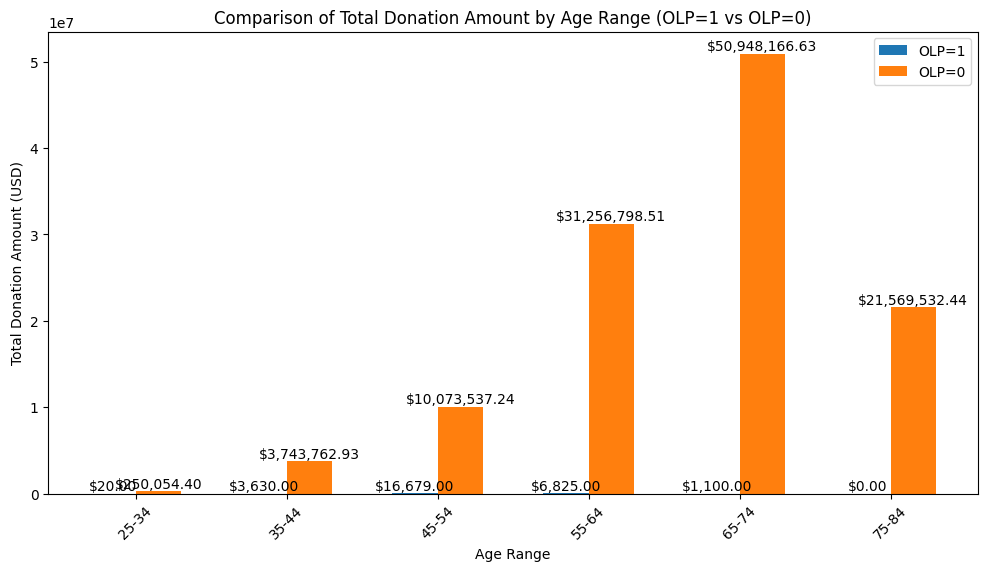

In [19]:
# Calculate the total donation amount per age range for OLP=1 and OLP=0 groups
olp_1_amount_total = df_olp_1.groupby('Age Range')['Gies Lifetime Giving as of 1/8/25'].sum()
olp_0_amount_total = df_olp_0.groupby('Age Range')['Gies Lifetime Giving as of 1/8/25'].sum()

plt.figure(figsize=(12, 6))

# Create bar charts for OLS=1 and OLS=0 groups
bars1 = plt.bar(numeric_index_olp_1 - 0.15, olp_1_amount_total.values, width=0.3, label='OLP=1')
bars2 = plt.bar(numeric_index_olp_0 + 0.15, olp_0_amount_total.values, width=0.3, label='OLP=0')

# Add value labels on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10)

# Set axis labels and title
plt.xlabel('Age Range')
plt.ylabel('Total Donation Amount (USD)')
plt.title('Comparison of Total Donation Amount by Age Range (OLP=1 vs OLP=0)')

# Set x-axis labels with proper rotation
plt.xticks(list(age_mapping.values()), list(age_mapping.keys()), rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.show()
